# Introduction to Python and data science

In [ ]:
# ==== Environment Setup ====
# Detects Colab vs local and provides cross-platform utilities

import os
import sys

# Detect environment
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("✓ Running on Google Colab")
else:
    print("✓ Running locally")

def download_file(url: str, filename: str) -> str:
    """Download file if it doesn't exist. Works on both Colab and local."""
    if os.path.exists(filename):
        print(f"✓ {filename} already exists")
        return filename
    
    print(f"Downloading {filename}...")
    if IN_COLAB:
        import subprocess
        subprocess.run(['wget', '-q', url, '-O', filename], check=True)
    else:
        import urllib.request
        urllib.request.urlretrieve(url, filename)
    print(f"✓ Downloaded {filename}")
    return filename

In [ ]:
# ==== Device Setup ====
import torch

def get_device():
    """Get best available device: CUDA > MPS > CPU."""
    if torch.cuda.is_available():
        device = torch.device('cuda')
        print(f"✓ Using CUDA GPU: {torch.cuda.get_device_name(0)}")
    elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
        device = torch.device('mps')
        print("✓ Using Apple MPS (Metal)")
    else:
        device = torch.device('cpu')
        print("✓ Using CPU")
    return device

DEVICE = get_device()

<div class="markdown-google-sans">
  <h2>Introduction to Colab</h2>
</div>

In previous classes we had been using Jupyter Notebooks together with an IDE on our computer. For the DL class we will be using Colab.

Colab is a notebook tool from Google or "Colaboratory", allows you to write and execute Python in your browser, without any installation required on your machine. It comes with some advantages:

1.  Zero configuration required
2.  Access to GPUs free of charge
3.  Easy sharing

For a full Colab tutorial, watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI).




<div class="markdown-google-sans">
  <h2>Workstation setup</h2>
</div>

During the lab, we will be working in Colab and use the Moodle page to upload and download resources.

Colab comes with most standard Python packages, that you can mostly directly import. For a list of all the available packages, type:

`!pip list`.

Which runs the shell command `pip list` inside the notebook environment. It’s useful for checking which libraries are available in your current Colab session.

In case you have to install a package (see below), type:

 `!pip install package_name` .

This installs a package into your Python environment.


In [ ]:
# Install selenium (uncomment if needed)
# Only needed for web scraping examples
# !pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.15.0
    Uninstalling typing_extensions-4.15.0:
      Successfully uninstalled typing_extensions-4.15.0


In [ ]:
import selenium

This loads a package that’s already installed into your running Python session so you can use it

<div class="markdown-google-sans">
  <h2>Recap programming</h2>
</div>

We will start refreshing our programming skills using the notorious [1963 Iris database](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [ ]:
import pandas as pd
import numpy as np
import numpy.random as rand
from sklearn.datasets import *

In [ ]:
data_dict = load_iris(as_frame=True) # as_frame arg loads as a pandas DataFrame (with metadata), instead of just as NumPy arrays.

In [ ]:
data_dict # a dict of dfs

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [ ]:
df = data_dict['data']
label = data_dict['target']

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
label

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
df[df['sepal length (cm)'] <= 5].sort_values(by='sepal length (cm)',ascending=False)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
7,5.0,3.4,1.5,0.2
25,5.0,3.0,1.6,0.2
26,5.0,3.4,1.6,0.4
43,5.0,3.5,1.6,0.6
49,5.0,3.3,1.4,0.2
40,5.0,3.5,1.3,0.3
35,5.0,3.2,1.2,0.2
93,5.0,2.3,3.3,1.0
60,5.0,2.0,3.5,1.0


In [ ]:
# @title TASK 1: print the average sepal length (cm) across all observations and its standard deviation.
df['sepal length (cm)'].mean(), df['sepal length (cm)'].std()

(np.float64(5.843333333333334), 0.8280661279778629)

In [ ]:
# implement here

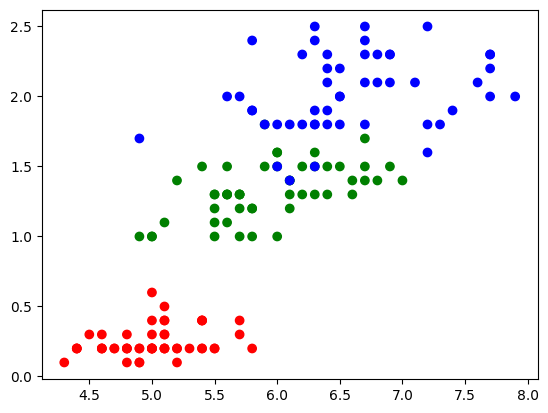

In [ ]:
#@title TASK 2: scatter plot the petal length against its petal width and color each data point according to its label. You may want to import matplotlib or your plotting library of choice.
import matplotlib.pyplot as plt

color = {0:"red", 1:"green", 2:"blue"}

plt.scatter(df['sepal length (cm)'], df['petal width (cm)'], color=label.map(color))

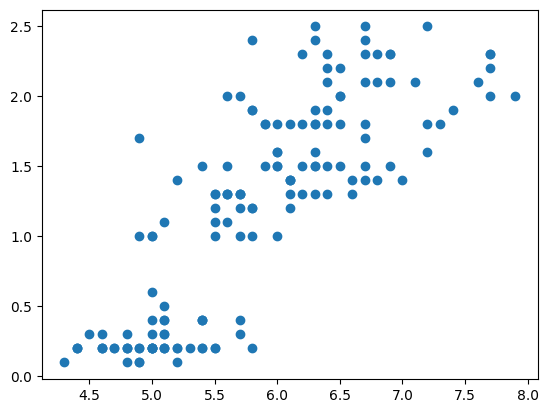

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['sepal length (cm)'], df['petal width (cm)'])

# Classes in Python

In [ ]:
class Car:
  def __init__(self,brand):
    self.brand = brand

brand = 'audi'

car = Car(brand='audi')

print(car.brand != brand)
print(car.brand)

False
audi


In [ ]:
class Meal:
# Computes the price of your meal based on the total cost of is ingredients.
  def __init__(self, name, total_price=0):
    self.name = name
    self.ingredients = {}
    self.total_price = total_price

  def add_ingredient(self, ingredient, price=0):
    self.ingredients[ingredient] = price # adds new k-v pair (if doesn't exist, otherwise updates)
    self.total_price = self.compute_total_price()

  def compute_total_price(self):
    return sum(price for price in self.ingredients.values()) # generator expression given '()' - produces each price one by one, instead of building a full list in memory.

In [ ]:
##TO DO: compute the price of your morning porridge

# 1) define a object called 'Breakfast'
# 2) add various ingredients
# 3) calculate the total price

breakfast = Meal('porridge')

breakfast.add_ingredient('milk', 2)
breakfast.add_ingredient('more milk', 2)
breakfast.compute_total_price()

breakfast.ingredients

{'milk': 2, 'more milk': 2}

In [ ]:
#@title TASK 3: build method add_ingredients that takes as input a list of ingredients and a list of prices and add them to the meal. The function should also check that the length of the two lists is compatible.

class Meal:
    def __init__(self, name, total_price=0):
        self.name = name
        self.ingredients = {}

    def add_ingredients(self, ingredients, prices):
        if len(ingredients) != len(prices):
            return None

        for i in range(len(ingredients)):
            ingredient, price = ingredients[i], prices[i]
            self.add_ingredient(ingredient, price)

In [ ]:
class Meal:
    def __init__(self, name, total_price=0):
        self.name = name
        self.ingredients = {}
        self.total_price = total_price



In [ ]:
#@title TASK 4: implement child class "HappyMeal". Add a private attribute to define the meal discount and a private method to apply discount. The discount should be applied when computing final price.

class HappyMeal(Meal): # 1) inherit from base class `Meal`

  def __init__(self, discount=.7): # 2) define constructor with any extra downstream argument(s) (here: 'discount')

    super().__init__(name='HappyMeal') # 3) call parent constructor

    self.add_ingredient('nuggets', 4)
    self.add_ingredient('fries', 3)
    self.add_ingredient('fanta', 1.99)

    self._discount = discount # Python doesn’t have true private variables like Java or C++, but we use naming convention
    assert (discount >= 0) & (discount <= 1), 'this discount is too high!!' # NB if expression evaluates to False -> AssertionError raised

    self.discounted_price = self.compute_total_price() * self._discount


In [ ]:
# implement here

In [ ]:
hp = HappyMeal(discount=1.1)

AttributeError: 'HappyMeal' object has no attribute 'add_ingredient'

<h1> Loading data in Colab </h1>

In [ ]:
# Load external data (works on both Colab and local)
import os

# Create data directory
os.makedirs('data', exist_ok=True)

# Download the CSV file
url = 'https://data.open-power-system-data.org/conventional_power_plants/2020-10-01/conventional_power_plants_DE.csv'
filename = 'data/conventional_power_plants_DE.csv'
download_file(url, filename)

In [ ]:
df

In [ ]:
#@title Save data to Google Drive (Colab) or local directory

# This cell demonstrates saving data - works on both Colab and local
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    save_path = '/content/drive/MyDrive/lab_data.csv'
else:
    # Save locally in current directory
    save_path = 'lab_data.csv'

df.to_csv(save_path, index=False)
print(f"✓ Saved data to {save_path}")

In [ ]:
# Clean up saved file (optional)
import os
saved_file = 'lab_data.csv'  # Adjust path as needed
if os.path.exists(saved_file):
    os.remove(saved_file)
    print(f"Removed {saved_file}")

<div class="markdown-google-sans">
  <h2>Preprocessing<h2>
</div>

Preprocessing is a crucial step to clean and prepare raw data for modeling. It involves:
<ul>
  <li> cleaning: handling of missing values, duplicates and outliers </li>
  <li> rescaling: conversion of numerical data to new scales (e.g. normalization and standardization), encoding categorical variables (e.g. via dummy variables) </li>
  <li> feature selection and analysis: statistical analysis and visualisation (e.g. histograms, correlation, pairwise scatterplots)</li>
</ul>

In [ ]:
#@title TASK 5: Keep only power plants with non NaN Bundesland and fill NaNs in the installed capacity (MW) (lektrische Bruttoleistung (MW)) with a 0 value. Make a new dataframe containing the installed capacity in MW and dummy columns for the state the units belongs to

processed_df = df.copy()

processed_df = processed_df[['Kraftwerksname / Standort', 'Bundesland', 'Elektrische Bruttoleistung (MW)']]
processed_df.dropna(subset=['Bundesland'], inplace=True)
processed_df['Elektrische Bruttoleistung (MW)'].fillna(0, inplace=True)

bl_dummies = pd.get_dummies(processed_df['Bundesland']) # returns a new df w/ same rox indexes, where columns are Bundesland row values -> one-hot-encoded

processed_df = pd.concat([processed_df, bl_dummies], axis=1) # column-wise
processed_df.head(5)


In [ ]:
#@title TASK 5: Rescale each power plant to an installed capacity between 0 and 1. Scaling should be done based on the state (i.e. the smallest power plant for each state has scaled capacity of 0, the biggest of 1)

def min_max_scaler(col):
  vmin, vmax = min(col), max(col) # value min / value max

  return (col - vmin) / (vmax - vmin)


# NB can also use sklearn's MinMaxScaler

processed_df['Scaled capacity'] = (
    processed_df.groupby('Bundesland', group_keys=False) # ensures original row alignment preserved; w/o it, mutli-indexed df
    .apply(lambda df: min_max_scaler(df['Elektrische Bruttoleistung (MW)'])) # [general form] `lambda arguments: expression`
)




In [ ]:
# lambda fn 1
def sort_evens(list_1)
    list_2 = for i in list_1(i % 2)

    return list_2

nums = [1, 2, 3, 4, 5, 6]
evens = list(filter(sort_evens, nums)) # filter(function, iterable)
print(evens)

# lambda fn 2
nums_2 = [1, 2, 3, 4]
squares = list(map(lambda x: x**2, nums_2)) # map(function, iterable)
print(squares)